In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
cd drive/My Drive

/content/drive/My Drive


In [0]:
!unzip C_685-anno.zip

Streaming output truncated to the last 5000 lines.
  inflating: C_685-anno/00334_cloth.png  
  inflating: C_685-anno/00333_nose.png  
  inflating: C_685-anno/00333_u_lip.png  
  inflating: C_685-anno/00327_l_brow.png  
  inflating: C_685-anno/00330_skin.png  
  inflating: C_685-anno/00335_skin.png  
  inflating: C_685-anno/00336_l_ear.png  
  inflating: C_685-anno/00333_l_ear.png  
  inflating: C_685-anno/00328_nose.png  
  inflating: C_685-anno/00335_l_ear.png  
  inflating: C_685-anno/00325_r_brow.png  
  inflating: C_685-anno/00330_neck.png  
  inflating: C_685-anno/00333_l_brow.png  
  inflating: C_685-anno/00328_l_ear.png  
  inflating: C_685-anno/00335_r_ear.png  
  inflating: C_685-anno/00334_hair.png  
  inflating: C_685-anno/00333_r_ear.png  
  inflating: C_685-anno/00327_r_brow.png  
  inflating: C_685-anno/00332_hair.png  
  inflating: C_685-anno/00329_l_ear.png  
  inflating: C_685-anno/00331_l_ear.png  
  inflating: C_685-anno/00329_ear_r.png  
  inflating: C_685-anno/0033

In [0]:
!unzip C_685.zip

Archive:  C_685.zip
  inflating: C_685/99.jpg            
  inflating: C_685/95.jpg            
  inflating: C_685/97.jpg            
  inflating: C_685/98.jpg            
  inflating: C_685/93.jpg            
  inflating: C_685/86.jpg            
  inflating: C_685/96.jpg            
  inflating: C_685/94.jpg            
  inflating: C_685/88.jpg            
  inflating: C_685/91.jpg            
  inflating: C_685/89.jpg            
  inflating: C_685/87.jpg            
  inflating: C_685/92.jpg            
  inflating: C_685/79.jpg            
  inflating: C_685/85.jpg            
  inflating: C_685/9.jpg             
  inflating: C_685/84.jpg            
  inflating: C_685/77.jpg            
  inflating: C_685/80.jpg            
  inflating: C_685/82.jpg            
  inflating: C_685/78.jpg            
  inflating: C_685/81.jpg            
  inflating: C_685/8.jpg             
  inflating: C_685/83.jpg            
  inflating: C_685/76.jpg            
  inflating: C_685/72.jpg     

In [0]:
import os
import sys
import random
import warnings

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from tqdm import tqdm
from itertools import chain
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize
from skimage.morphology import label

from keras.models import Model, load_model
from keras.layers import Input
from keras.layers.core import Dropout, Lambda
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
from keras.preprocessing.image import save_img

import tensorflow as tf
from shutil import copyfile
import cv2

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


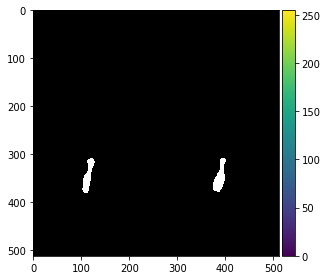

In [0]:
imshow(imread("C_685-anno/00685_ear_r.png"))

In [0]:
os.mkdir("C_685-anno_eyes")

In [0]:
l=[]
s=''
c=0
for filename in os.listdir("C_685-anno/"):
  #print(filename)
  l=filename.split("_")
  s=" ".join(l[1:])
  #print(s)
  if(s=='l eye.png' or s=='r eye.png'):
    #print('ok')
    #c=c+1
    #print(c)
    copyfile("C_685-anno/"+filename,"C_685-anno_eyes/"+filename)  

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


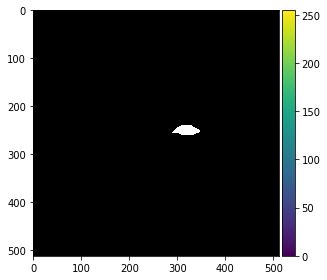

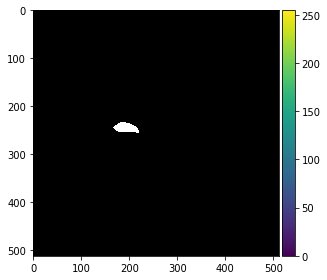

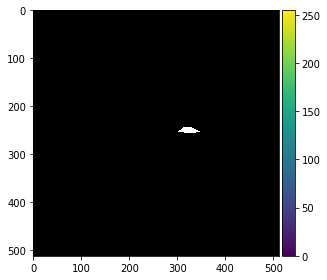

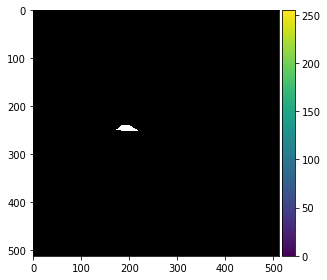

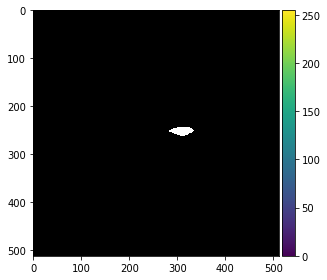

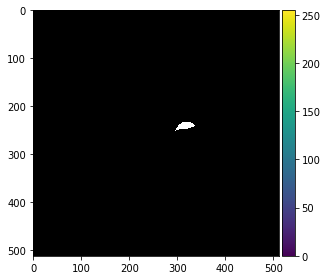

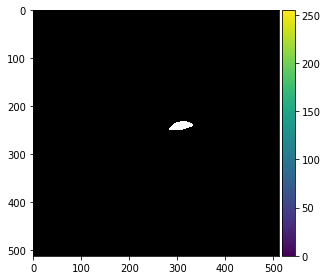

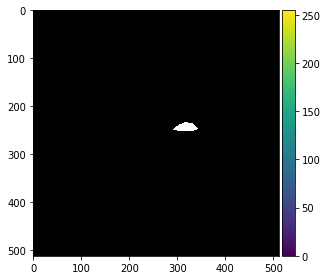

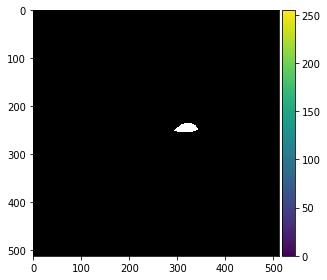

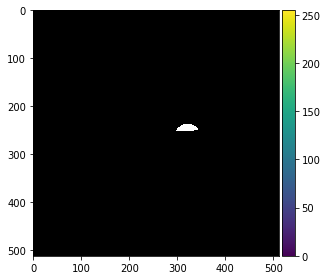

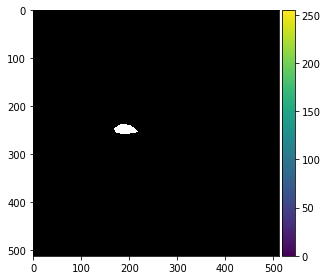

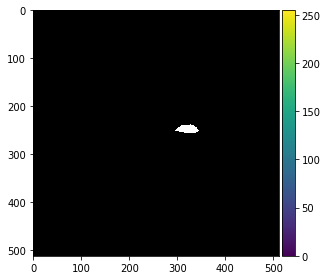

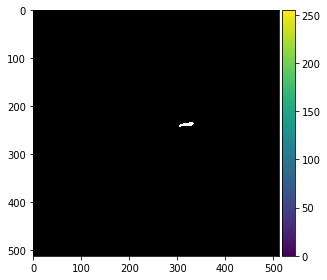

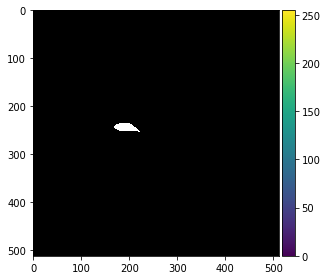

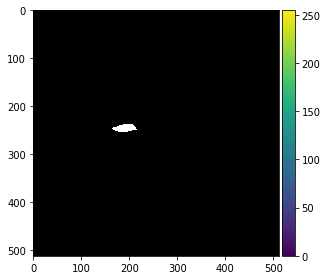

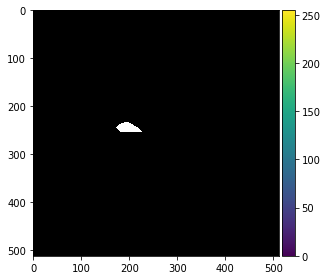

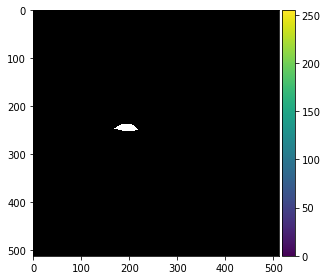

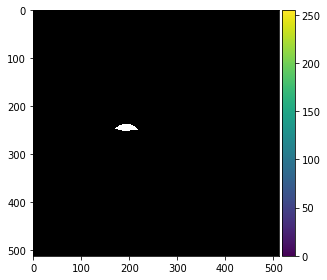

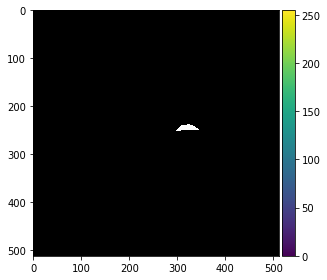

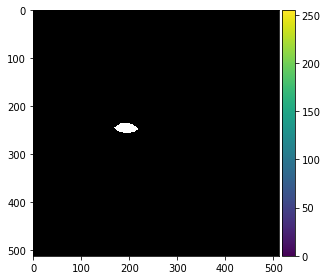

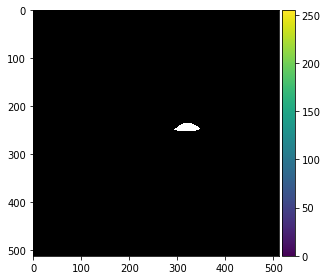

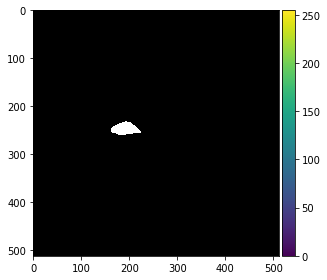

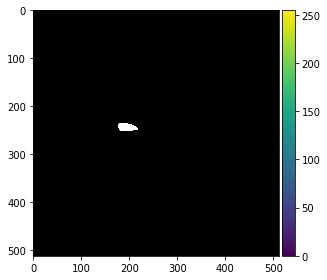

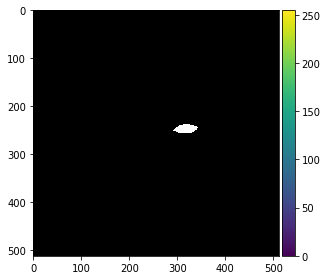

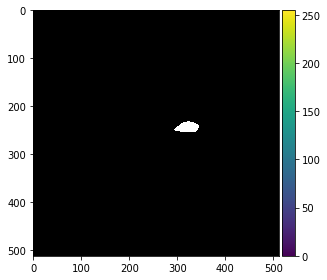

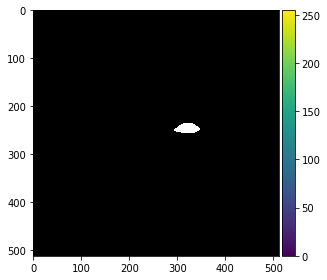

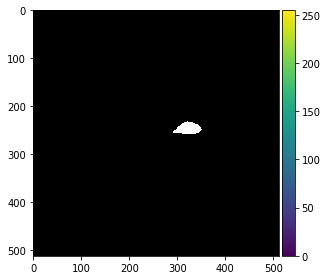

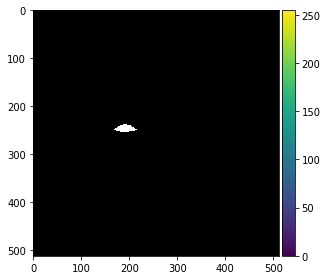

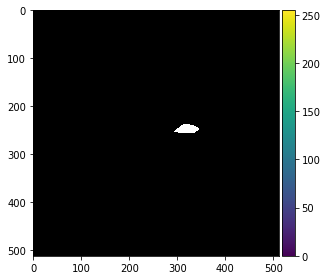

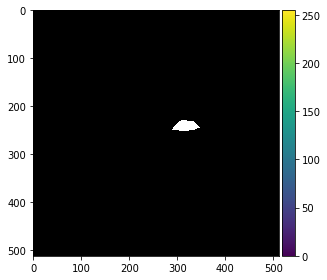

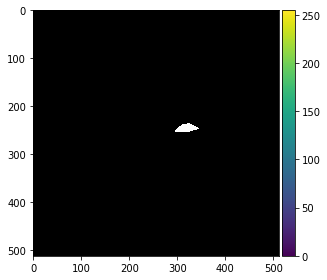

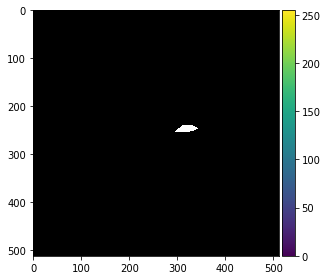

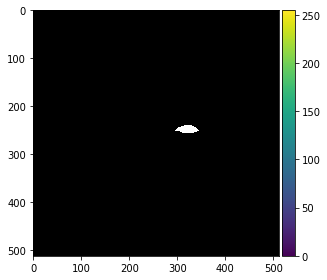

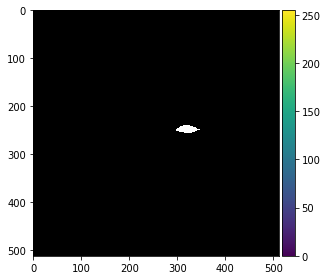

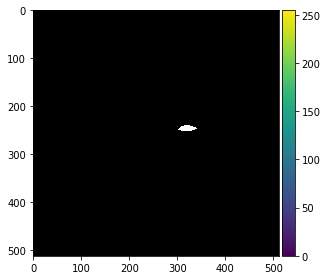

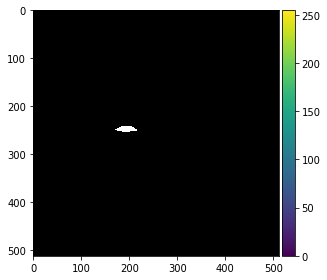

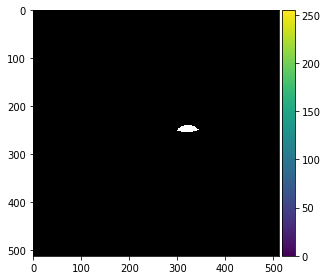

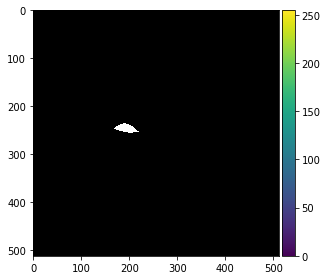

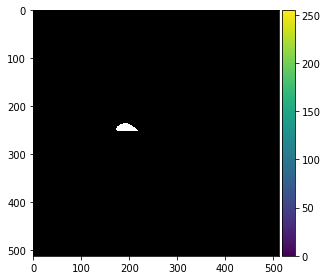

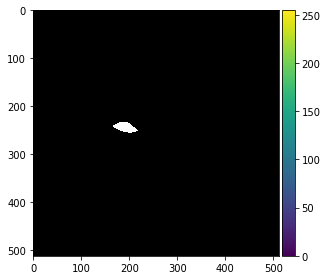

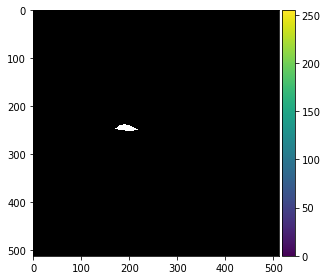

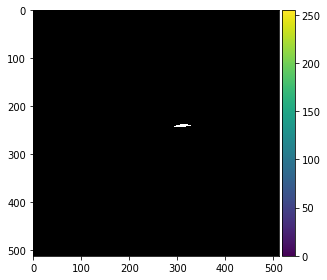

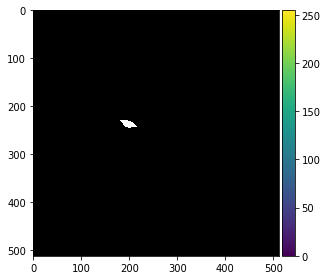

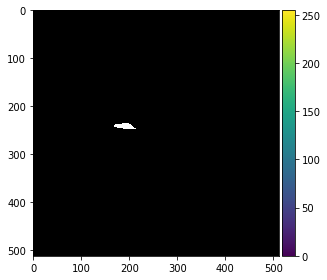

KeyboardInterrupt: ignored

In [0]:
for file in os.listdir("C_685-anno_eyes/"):
  imshow(imread("C_685-anno_eyes/"+file))
  plt.show()

In [0]:
os.mkdir("C_685-anno_lips")

In [0]:
l=[]
s=''
c=0
for filename in os.listdir("C_685-anno/"):
  #print(filename)
  l=filename.split("_")
  s=" ".join(l[1:])
  #print(s)
  if(s=='l lip.png' or s=='u lip.png'):
    #print('ok')
    #c=c+1
    #print(c)
    copyfile("C_685-anno/"+filename,"C_685-anno_lips/"+filename)  

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


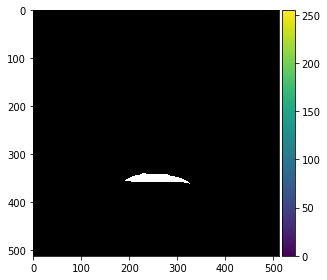

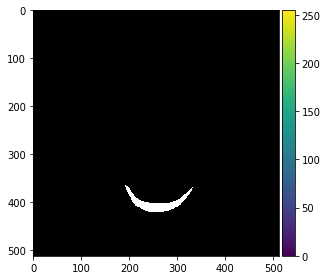

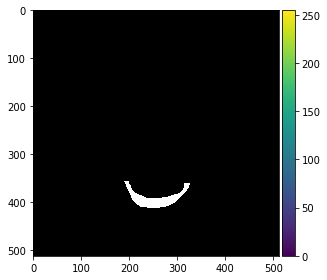

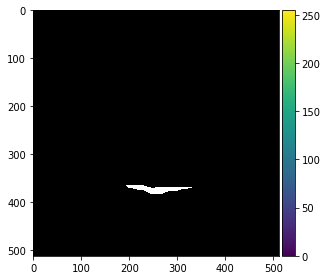

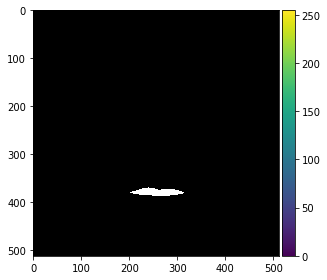

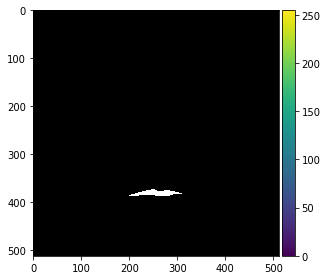

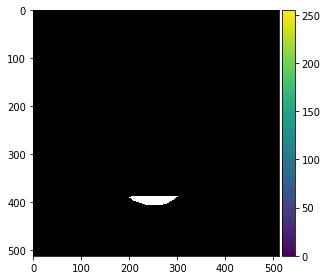

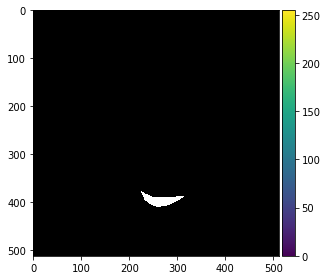

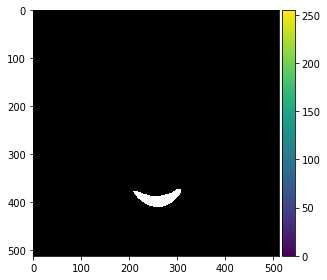

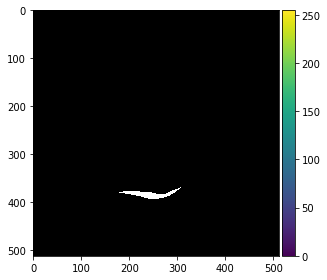

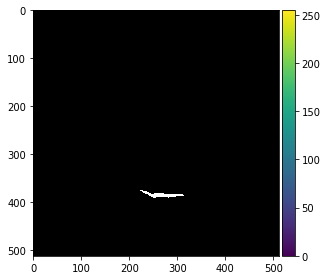

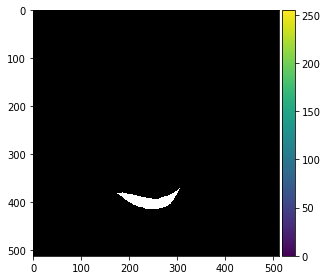

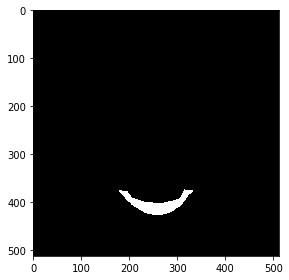

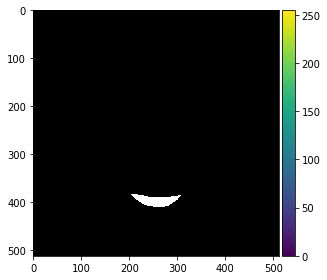

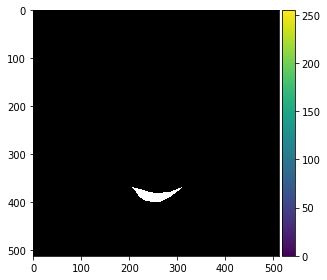

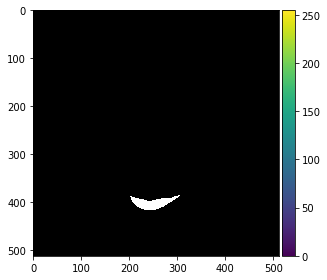

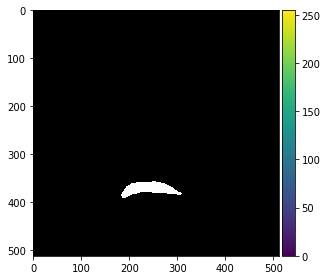

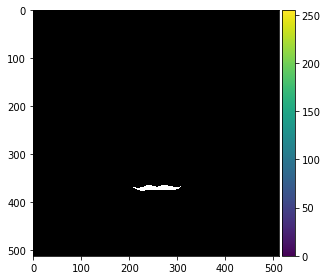

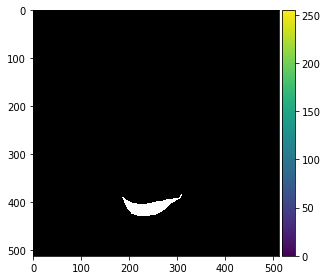

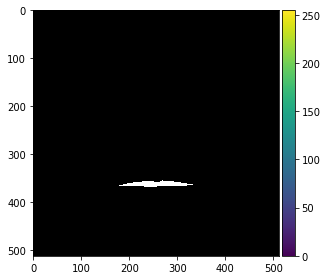

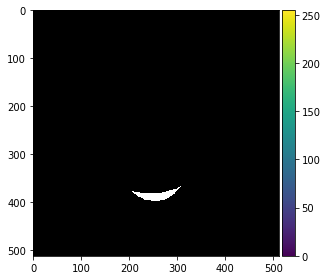

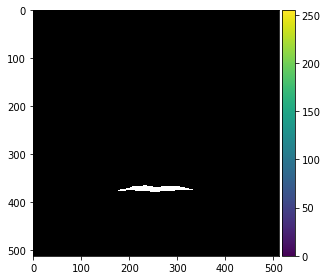

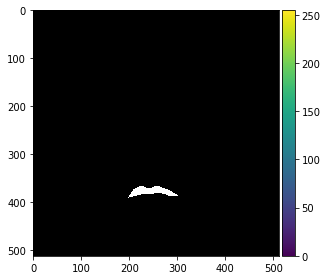

KeyboardInterrupt: ignored

In [0]:
for file in os.listdir("C_685-anno_lips/"):
  imshow(imread("C_685-anno_lips/"+file))
  plt.show()

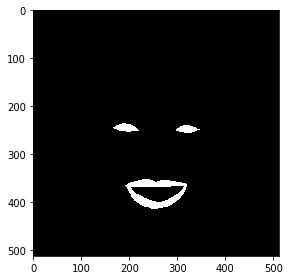

In [0]:
im1=imread("C_685-anno_lips/00673_l_lip.png")
im2=imread("C_685-anno_eyes/00673_l_eye.png")
im3=imread("C_685-anno_lips/00673_u_lip.png")
im4=imread("C_685-anno_eyes/00673_r_eye.png")
im5=np.maximum(np.asarray(im1),np.asarray(im2))
im6=np.maximum(np.asarray(im3),np.asarray(im4))
im7=np.maximum(np.asarray(im5),np.asarray(im6))
imshow(im7)
plt.show()

In [0]:
os.mkdir("C_685-anno_eyes_and_lips")

In [0]:
d={}
for filename in os.listdir('C_685-anno_eyes/'):
  desc=" ".join(filename.split(".png")[0].split("_")[1:])
  id=int(filename.split("_")[0])
  if(id in list(d.keys())):
    d[id].append(desc)
  else:
    d[id]=list([desc])

In [0]:
d

{0: ['r eye', 'l eye'],
 1: ['l eye', 'r eye'],
 2: ['r eye', 'l eye'],
 3: ['l eye', 'r eye'],
 4: ['r eye', 'l eye'],
 5: ['r eye', 'l eye'],
 6: ['l eye', 'r eye'],
 7: ['l eye', 'r eye'],
 8: ['r eye', 'l eye'],
 9: ['l eye', 'r eye'],
 10: ['l eye', 'r eye'],
 11: ['r eye', 'l eye'],
 12: ['l eye', 'r eye'],
 13: ['r eye', 'l eye'],
 14: ['l eye', 'r eye'],
 15: ['l eye', 'r eye'],
 16: ['r eye', 'l eye'],
 17: ['l eye', 'r eye'],
 18: ['l eye', 'r eye'],
 19: ['r eye', 'l eye'],
 20: ['r eye', 'l eye'],
 21: ['l eye', 'r eye'],
 22: ['l eye', 'r eye'],
 23: ['r eye', 'l eye'],
 24: ['r eye', 'l eye'],
 25: ['r eye', 'l eye'],
 26: ['l eye', 'r eye'],
 27: ['r eye', 'l eye'],
 28: ['r eye', 'l eye'],
 29: ['r eye', 'l eye'],
 30: ['l eye', 'r eye'],
 31: ['l eye', 'r eye'],
 32: ['r eye', 'l eye'],
 33: ['r eye', 'l eye'],
 34: ['r eye', 'l eye'],
 35: ['r eye', 'l eye'],
 36: ['r eye', 'l eye'],
 37: ['l eye', 'r eye'],
 38: ['l eye', 'r eye'],
 39: ['r eye', 'l eye'],
 40: ['l e

In [0]:
eyes_defective_images=[]
for i in range(0,686):
  if i in list(d.keys()):
    if(d[i]!=['l eye', 'r eye'] and d[i]!=['r eye', 'l eye']):
      eyes_defective_images.append(i)
  else:
    eyes_defective_images.append(i)

In [0]:
eyes_defective_images

[179, 286, 292, 349, 410, 638, 667, 671, 683, 685]

In [0]:
e_def_present=[]
for i in eyes_defective_images:
  if(i in list(d.keys())):
    e_def_present.append(i)
    print(i,d[i])
  else:
    print(i,"NOT in d")

179 NOT in d
286 NOT in d
292 NOT in d
349 NOT in d
410 NOT in d
638 ['l eye']
667 NOT in d
671 ['r eye']
683 NOT in d
685 ['l eye']


In [0]:
d2={}
for filename in os.listdir('C_685-anno_lips/'):
  desc=" ".join(filename.split(".png")[0].split("_")[1:])
  id=int(filename.split("_")[0])
  if(id in list(d2.keys())):
    d2[id].append(desc)
  else:
    d2[id]=list([desc])

In [0]:
d2

{0: ['u lip', 'l lip'],
 1: ['l lip', 'u lip'],
 2: ['u lip', 'l lip'],
 3: ['l lip', 'u lip'],
 4: ['l lip', 'u lip'],
 5: ['u lip', 'l lip'],
 6: ['u lip', 'l lip'],
 7: ['l lip', 'u lip'],
 8: ['l lip', 'u lip'],
 9: ['u lip', 'l lip'],
 10: ['l lip', 'u lip'],
 11: ['u lip', 'l lip'],
 12: ['l lip', 'u lip'],
 13: ['u lip', 'l lip'],
 14: ['u lip', 'l lip'],
 15: ['u lip', 'l lip'],
 16: ['u lip', 'l lip'],
 17: ['u lip', 'l lip'],
 18: ['u lip', 'l lip'],
 19: ['l lip', 'u lip'],
 20: ['u lip', 'l lip'],
 21: ['u lip', 'l lip'],
 22: ['u lip', 'l lip'],
 23: ['l lip', 'u lip'],
 24: ['u lip', 'l lip'],
 25: ['l lip', 'u lip'],
 26: ['u lip', 'l lip'],
 27: ['l lip', 'u lip'],
 28: ['l lip', 'u lip'],
 29: ['u lip', 'l lip'],
 30: ['l lip', 'u lip'],
 31: ['l lip', 'u lip'],
 32: ['l lip', 'u lip'],
 33: ['u lip', 'l lip'],
 34: ['l lip', 'u lip'],
 35: ['u lip', 'l lip'],
 36: ['u lip', 'l lip'],
 37: ['u lip', 'l lip'],
 38: ['u lip', 'l lip'],
 39: ['l lip', 'u lip'],
 40: ['l l

In [0]:
lips_defective_images=[]
for i in range(0,686):
  if i in list(d2.keys()):
    if(d2[i]!=['l lip', 'u lip'] and d2[i]!=['u lip', 'l lip']):
      lips_defective_images.append(i)
  else:
    lips_defective_images.append(i)

In [0]:
lips_defective_images

In [0]:
l_def_present=[]
for i in lips_defective_images:
  if(i in list(d2.keys())):
    l_def_present.append(i)
    print(i,d2[i])
  else:
    print(i,"NOT in d2")

70 NOT in d2
252 ['u lip']
344 NOT in d2
404 NOT in d2
475 ['l lip']
685 NOT in d2


In [0]:
print("eyes:",eyes_defective_images)
print("lips:",lips_defective_images)

eyes: [179, 286, 292, 349, 410, 638, 667, 671, 683, 685]
lips: [70, 252, 344, 404, 475, 685]


In [0]:
total_defective_images=eyes_defective_images+lips_defective_images

In [0]:
total_defective_images=list(set(total_defective_images))

In [0]:
len(total_defective_images)

15

In [0]:
eye_def_present=[]
for i in total_defective_images:
  if(i in list(d.keys())):
    eye_def_present.append(i)
  else:
    print(i,"NOT in eyes")

292 NOT in eyes
683 NOT in eyes
179 NOT in eyes
410 NOT in eyes
667 NOT in eyes
349 NOT in eyes
286 NOT in eyes


In [0]:
lip_def_present=[]
for i in total_defective_images:
  if(i in list(d2.keys())):
    lip_def_present.append(i)
  else:
    print(i,"NOT in lips")

70 NOT in lips
685 NOT in lips
404 NOT in lips
344 NOT in lips


In [0]:
os.mkdir("C_685-defective")

In [0]:
for filename in os.listdir('C_685-anno_eyes/'):
  id=int(filename.split("_")[0])
  if(id in eye_def_present):
    copyfile("C_685-anno_eyes/"+filename,"C_685-defective/"+filename)
    os.remove("C_685-anno_eyes/"+filename)

In [0]:
len(os.listdir("C_685-anno_eyes/"))

1342

In [0]:
for filename in os.listdir('C_685-anno_lips/'):
  id=int(filename.split("_")[0])
  if(id in lip_def_present):
    copyfile("C_685-anno_lips/"+filename,"C_685-defective/"+filename)
    os.remove("C_685-anno_lips/"+filename)

In [0]:
len(os.listdir("C_685-anno_lips/"))

1342

In [0]:
for i in range(0,10):
  if i not in total_defective_images:
    id="0000"+str(i)
    print(id)

00000
00001
00002
00003
00004
00005
00006
00007
00008
00009


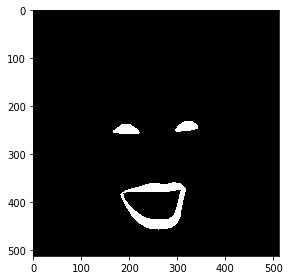

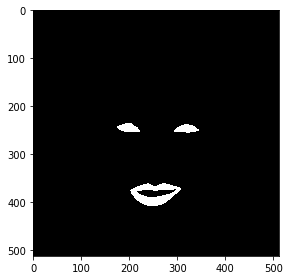

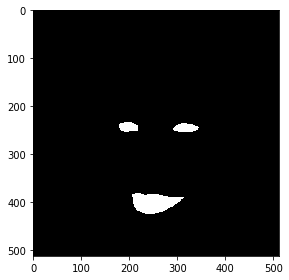

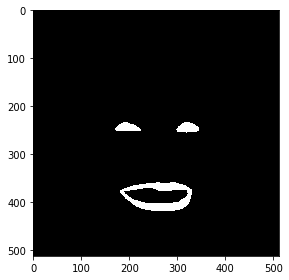

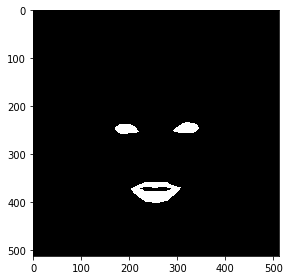

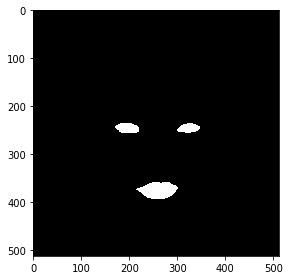

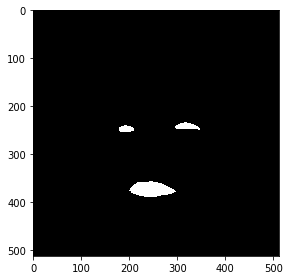

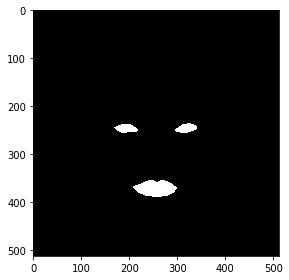

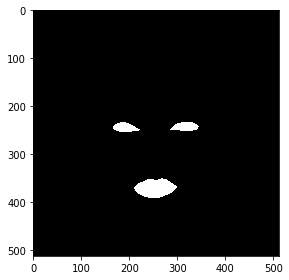

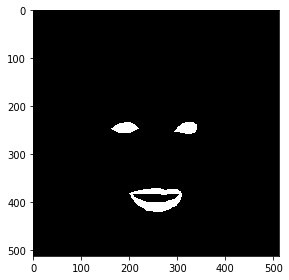

In [0]:
for i in range(0,10):
  if i not in total_defective_images:
    id="0000"+str(i)
    im1=imread("C_685-anno_lips/"+id+"_l_lip.png")
    im2=imread("C_685-anno_eyes/"+id+"_l_eye.png")
    im3=imread("C_685-anno_lips/"+id+"_u_lip.png")
    im4=imread("C_685-anno_eyes/"+id+"_r_eye.png")
    im5=np.maximum(np.asarray(im1),np.asarray(im2))
    im6=np.maximum(np.asarray(im3),np.asarray(im4))
    im7=np.maximum(np.asarray(im5),np.asarray(im6))
    imshow(im7)
    plt.show()
    save_img("C_685-anno_eyes_and_lips/eyes_and_lips_"+str(int(id))+".png",im7)

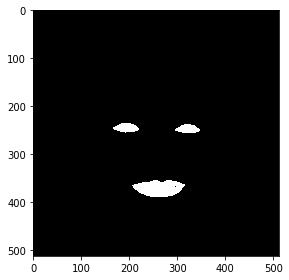

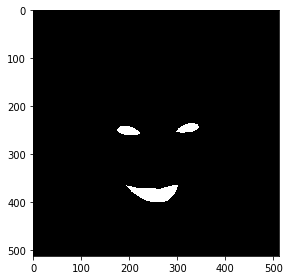

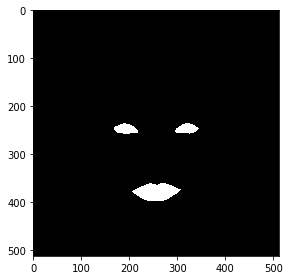

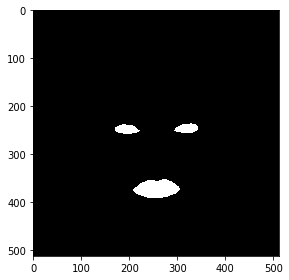

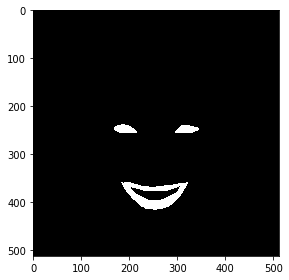

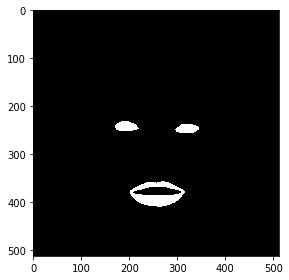

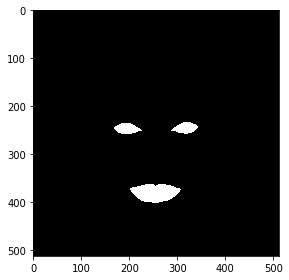

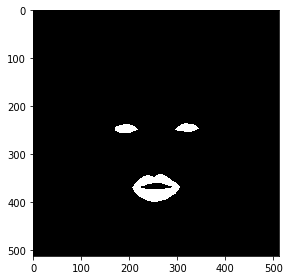

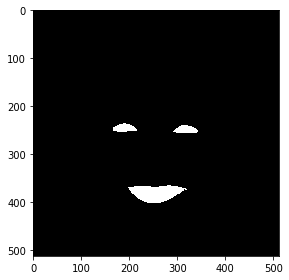

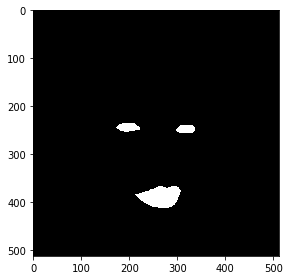

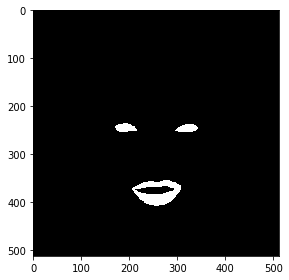

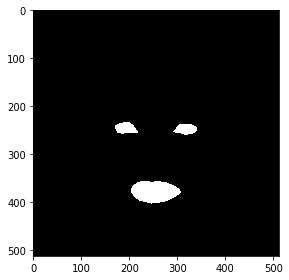

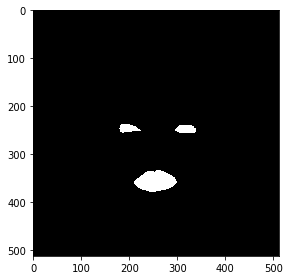

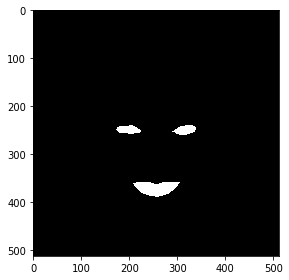

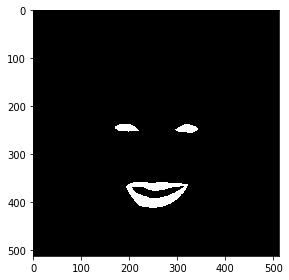

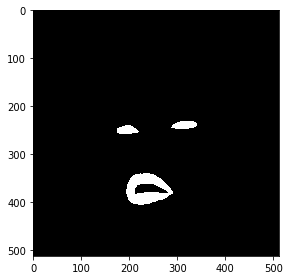

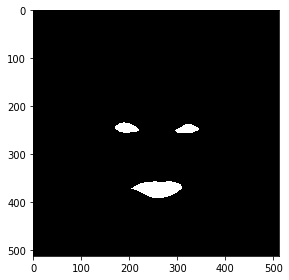

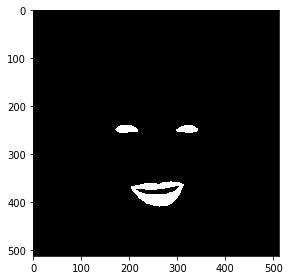

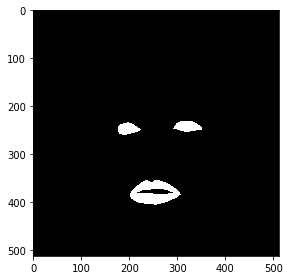

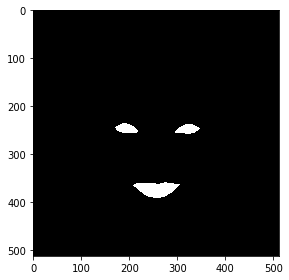

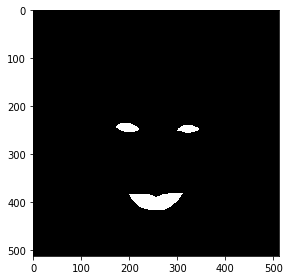

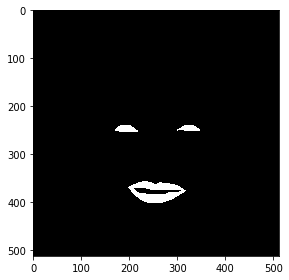

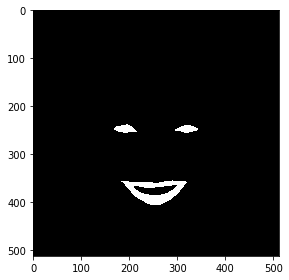

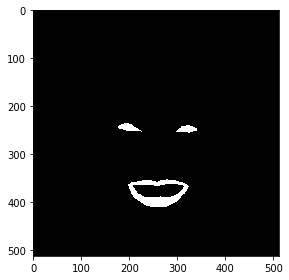

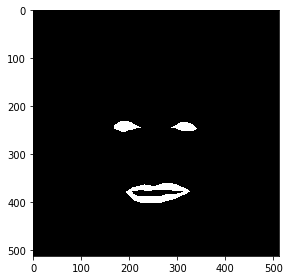

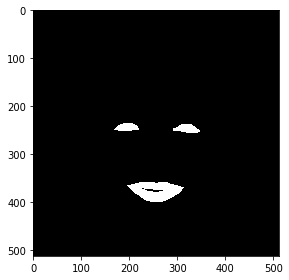

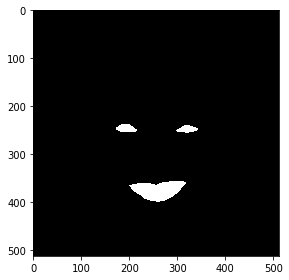

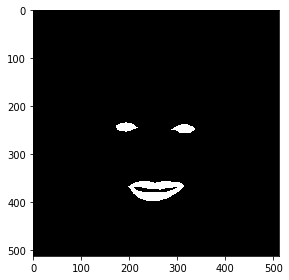

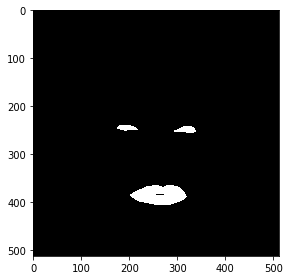

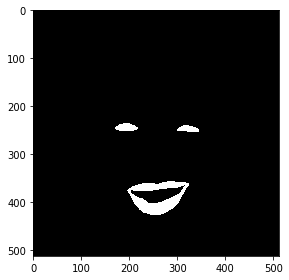

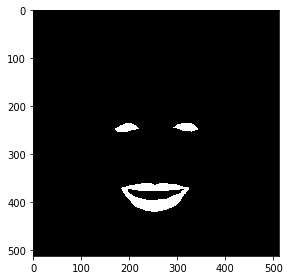

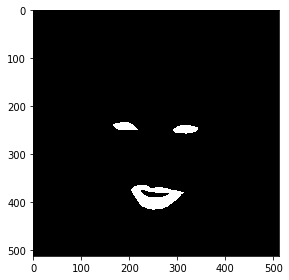

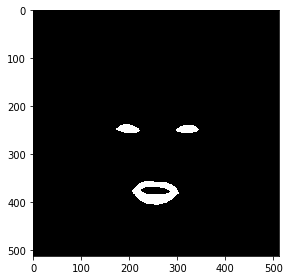

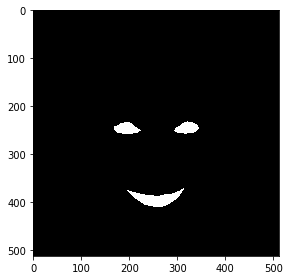

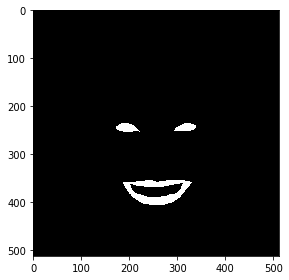

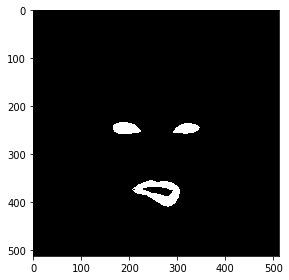

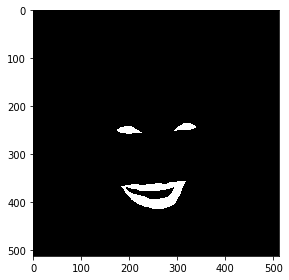

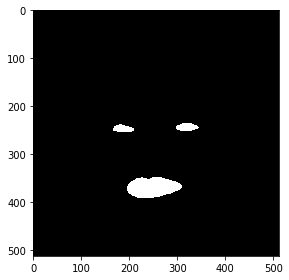

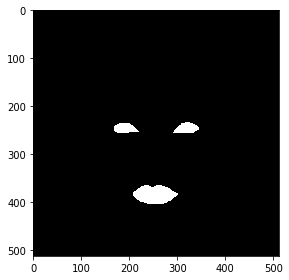

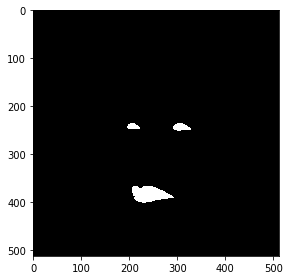

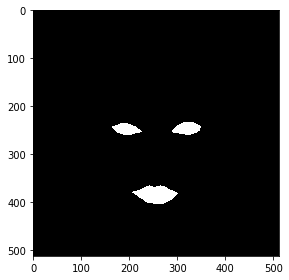

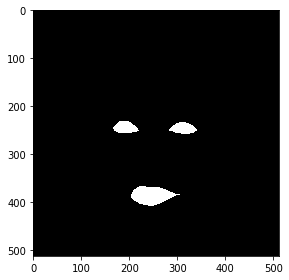

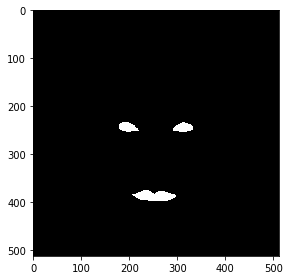

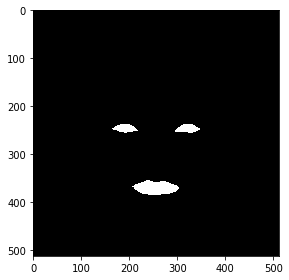

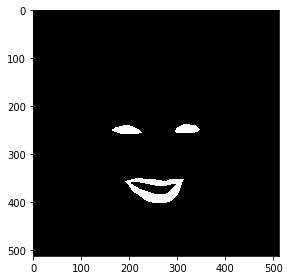

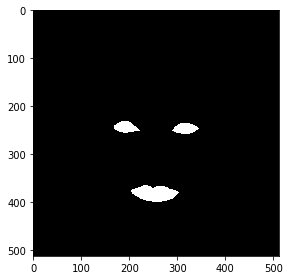

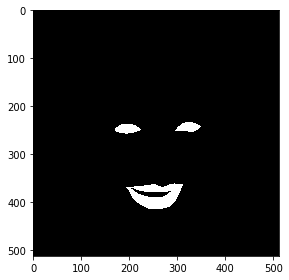

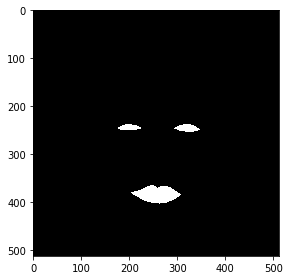

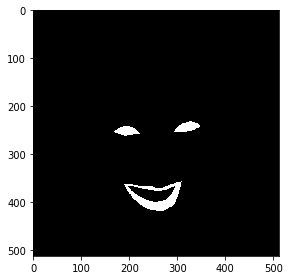

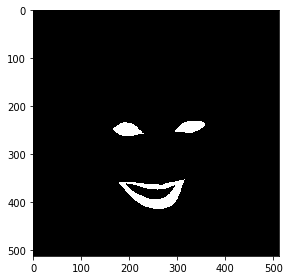

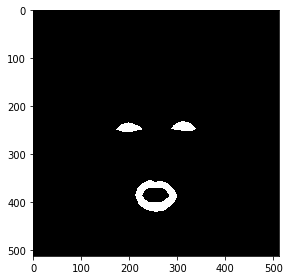

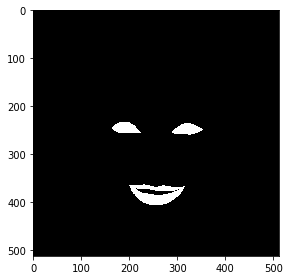

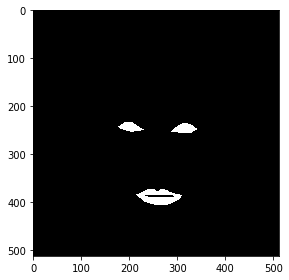

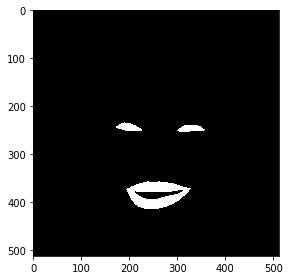

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


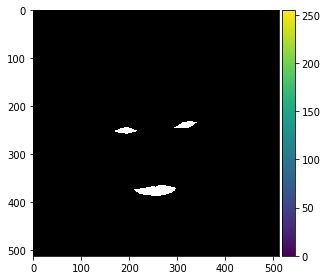

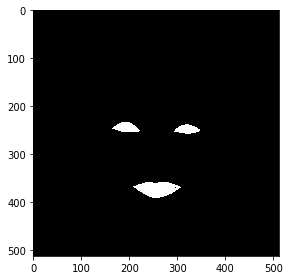

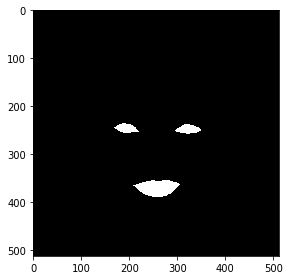

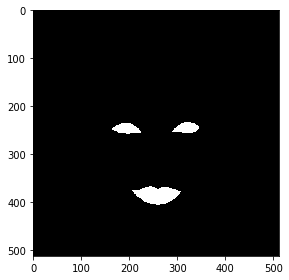

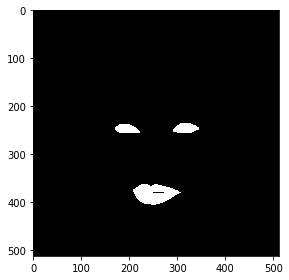

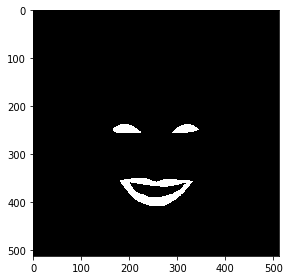

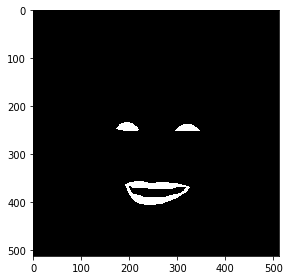

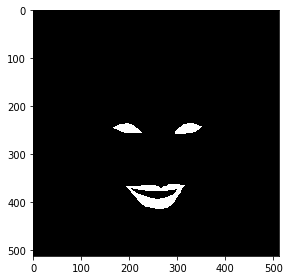

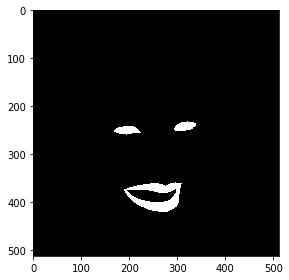

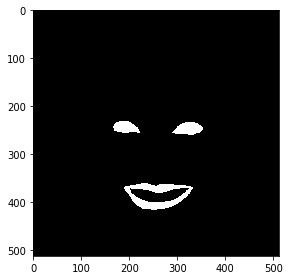

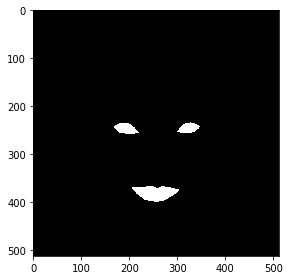

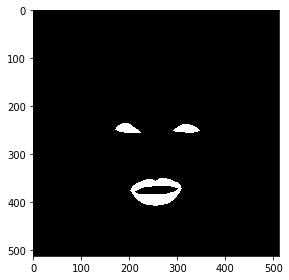

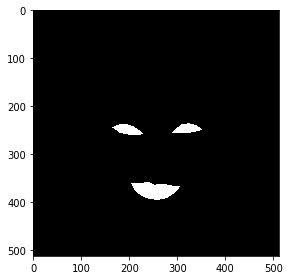

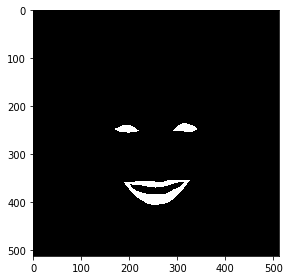

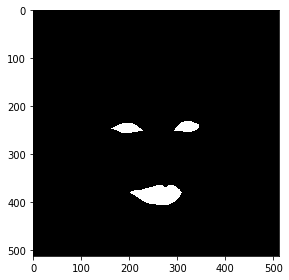

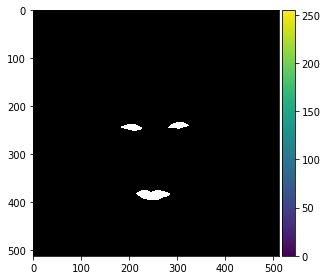

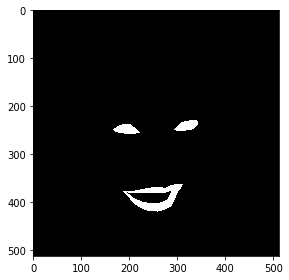

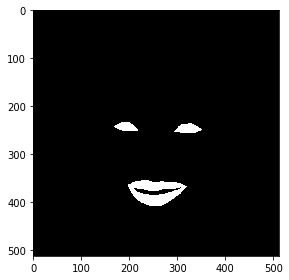

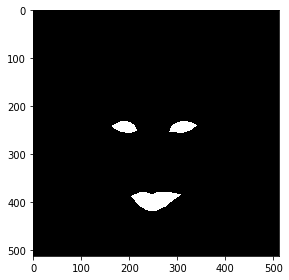

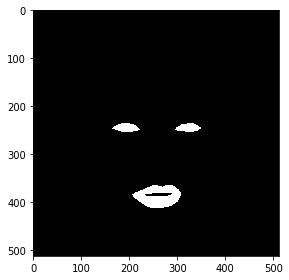

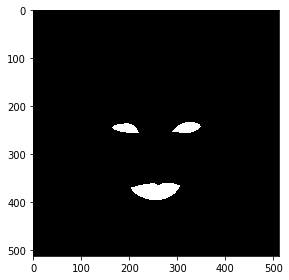

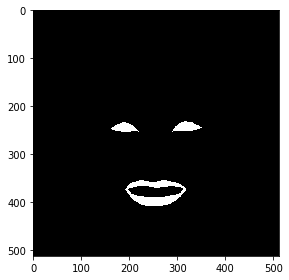

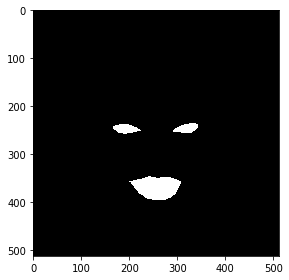

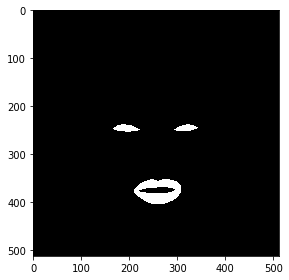

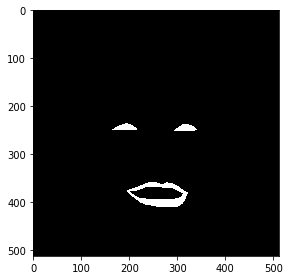

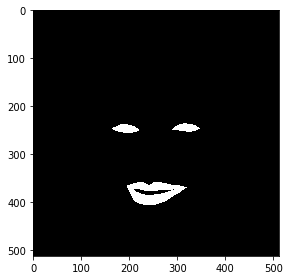

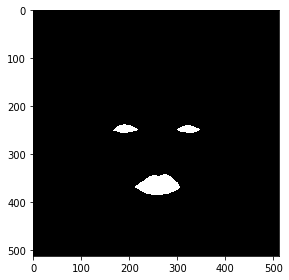

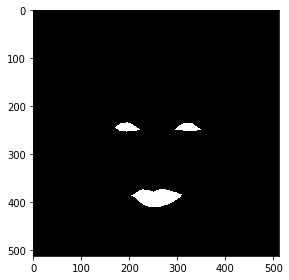

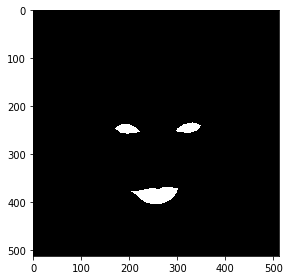

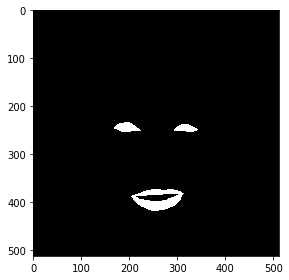

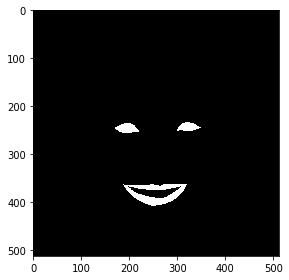

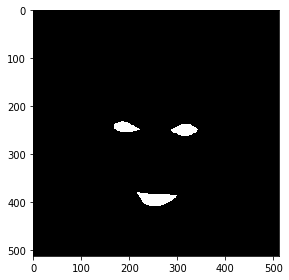

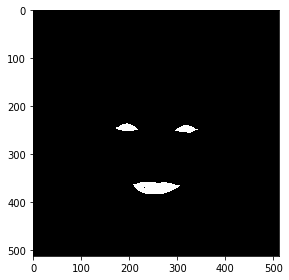

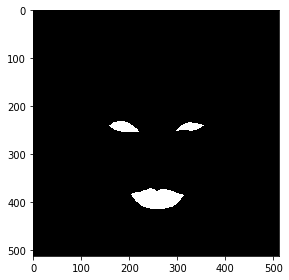

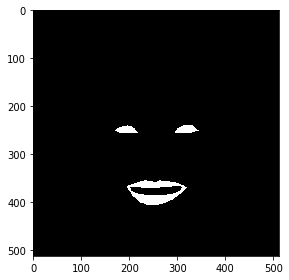

In [0]:
for i in range(10,100):
  if i not in total_defective_images:
    id="000"+str(i)
    im1=imread("C_685-anno_lips/"+id+"_l_lip.png")
    im2=imread("C_685-anno_eyes/"+id+"_l_eye.png")
    im3=imread("C_685-anno_lips/"+id+"_u_lip.png")
    im4=imread("C_685-anno_eyes/"+id+"_r_eye.png")
    im5=np.maximum(np.asarray(im1),np.asarray(im2))
    im6=np.maximum(np.asarray(im3),np.asarray(im4))
    im7=np.maximum(np.asarray(im5),np.asarray(im6))
    imshow(im7)
    plt.show()
    save_img("C_685-anno_eyes_and_lips/eyes_and_lips_"+str(int(id))+".png",im7)

In [0]:
for i in tqdm(range(100,686)):
  if i not in total_defective_images:
    id="00"+str(i)
    im1=imread("C_685-anno_lips/"+id+"_l_lip.png")
    im2=imread("C_685-anno_eyes/"+id+"_l_eye.png")
    im3=imread("C_685-anno_lips/"+id+"_u_lip.png")
    im4=imread("C_685-anno_eyes/"+id+"_r_eye.png")
    im5=np.maximum(np.asarray(im1),np.asarray(im2))
    im6=np.maximum(np.asarray(im3),np.asarray(im4))
    im7=np.maximum(np.asarray(im5),np.asarray(im6))
    #imshow(im7)
    #plt.show()
    save_img("C_685-anno_eyes_and_lips/eyes_and_lips_"+str(int(id))+".png",im7)

100%|██████████| 586/586 [00:21<00:00, 27.09it/s]


In [0]:
TRAIN_PATH='/content/drive/My Drive/C_685/'
train_ids = list(int(s.split(".")[0]) for s in list(next(os.walk(TRAIN_PATH))[2]))

In [0]:
len(train_ids)

671

In [0]:
IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3
TRAIN_PATH='/content/drive/My Drive/C_685/'
ANNOT_PATH="/content/drive/My Drive/C_685-anno_eyes_and_lips/"
#TEST_PATH = '../input/stage1_test/'

warnings.filterwarnings('ignore', category=UserWarning, module='skimage')
seed = 42
random.seed = seed
np.random.seed = seed

In [0]:
X_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)
print('Getting and resizing train images and masks ... ')
sys.stdout.flush()
for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):
  img = imread(TRAIN_PATH+str(id_)+'.jpg')[:,:,:IMG_CHANNELS]
  img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
  X_train[n] = img
  im_gray = cv2.imread(ANNOT_PATH+"eyes_and_lips_"+str(id_)+".png", cv2.IMREAD_GRAYSCALE)
  im_gray = resize(im_gray, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
  Y_train[n] = np.expand_dims(im_gray,axis=2)

Getting and resizing train images and masks ... 


100%|██████████| 671/671 [02:15<00:00,  4.94it/s]


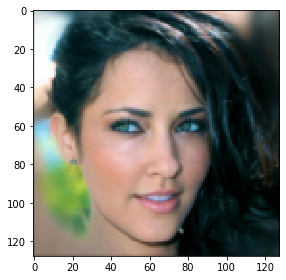

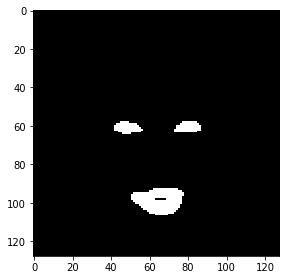

In [0]:
ix = random.randint(0, len(train_ids))
imshow(X_train[ix])
plt.show()
imshow(np.squeeze(Y_train[ix]))
plt.show()

In [0]:
def mean_iou(y_true, y_pred):
    prec = []
    for t in np.arange(0.5, 1.0, 0.05):
        y_pred_ = tf.to_int32(y_pred > t)
        score, up_opt = tf.metrics.mean_iou(y_true, y_pred_, 2)
        K.get_session().run(tf.local_variables_initializer())
        with tf.control_dependencies([up_opt]):
            score = tf.identity(score)
        prec.append(score)
    return K.mean(K.stack(prec), axis=0)

In [0]:
inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = Lambda(lambda x: x / 255) (inputs)

c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (s)
c1 = Dropout(0.1) (c1)
c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c1)
p1 = MaxPooling2D((2, 2)) (c1)

c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p1)
c2 = Dropout(0.1) (c2)
c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c2)
p2 = MaxPooling2D((2, 2)) (c2)

c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p2)
c3 = Dropout(0.2) (c3)
c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c3)
p3 = MaxPooling2D((2, 2)) (c3)

c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p3)
c4 = Dropout(0.2) (c4)
c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c4)
p4 = MaxPooling2D(pool_size=(2, 2)) (c4)

c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p4)
c5 = Dropout(0.3) (c5)
c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c5)

u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same') (c5)
u6 = concatenate([u6, c4])
c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u6)
c6 = Dropout(0.2) (c6)
c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c6)

u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c6)
u7 = concatenate([u7, c3])
c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u7)
c7 = Dropout(0.2) (c7)
c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c7)

u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c7)
u8 = concatenate([u8, c2])
c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u8)
c8 = Dropout(0.1) (c8)
c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c8)

u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c8)
u9 = concatenate([u9, c1], axis=3)
c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u9)
c9 = Dropout(0.1) (c9)
c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c9)

outputs = Conv2D(1, (1, 1), activation='sigmoid') (c9)

model = Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[mean_iou])
model.summary()





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Use `tf.cast` instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 128, 128, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 1

In [0]:
earlystopper = EarlyStopping(patience=5, verbose=1)
checkpointer = ModelCheckpoint('model-CelebMask685-1.h5', verbose=1, save_best_only=True)
results = model.fit(X_train, Y_train, validation_split=0.1, batch_size=16, epochs=50, 
                    callbacks=[earlystopper, checkpointer])

Train on 603 samples, validate on 68 samples
Epoch 1/50
603/603 [==============================] - 87s 144ms/step - loss: 0.1438 - mean_iou: 0.4747 - val_loss: 0.1078 - val_mean_iou: 0.4880

Epoch 00001: val_loss improved from inf to 0.10776, saving model to model-CelebMask685-1.h5
Epoch 2/50
603/603 [==============================] - 85s 141ms/step - loss: 0.0747 - mean_iou: 0.4920 - val_loss: 0.0504 - val_mean_iou: 0.5005

Epoch 00002: val_loss improved from 0.10776 to 0.05044, saving model to model-CelebMask685-1.h5
Epoch 3/50
603/603 [==============================] - 86s 142ms/step - loss: 0.0361 - mean_iou: 0.5255 - val_loss: 0.0327 - val_mean_iou: 0.5537

Epoch 00003: val_loss improved from 0.05044 to 0.03275, saving model to model-CelebMask685-1.h5
Epoch 4/50
603/603 [==============================] - 84s 140ms/step - loss: 0.0272 - mean_iou: 0.5766 - val_loss: 0.0274 - val_mean_iou: 0.5989

Epoch 00004: val_loss improved from 0.03275 to 0.02736, saving model to model-CelebMask

In [0]:
model = load_model('/content/drive/My Drive/model-CelebMask685-1.h5', custom_objects={'mean_iou': mean_iou})
preds_train = model.predict(X_train[:10], verbose=1)
# Threshold predictions
preds_train_t = (preds_train > 0.5).astype(np.uint8)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Use `tf.cast` instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
10/10 [==============================] - 1s 53ms/step


In [0]:
from copy import deepcopy
X_train2=deepcopy(X_train)
Y_train2=deepcopy(Y_train)

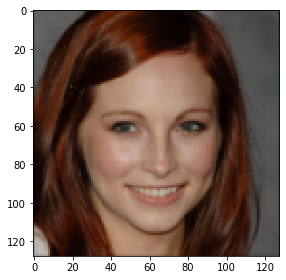

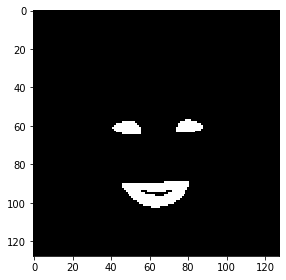

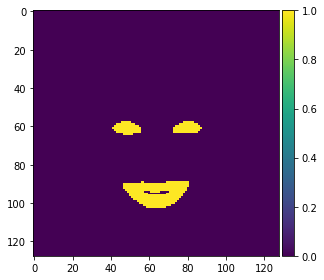

In [0]:
# Perform a sanity check on some random training samples
ix = random.randint(0, len(preds_train_t))
imshow(X_train2[ix])
plt.show()
imshow(np.squeeze(Y_train2[ix]))
plt.show()
imshow(np.squeeze(preds_train_t[ix]))
plt.show()

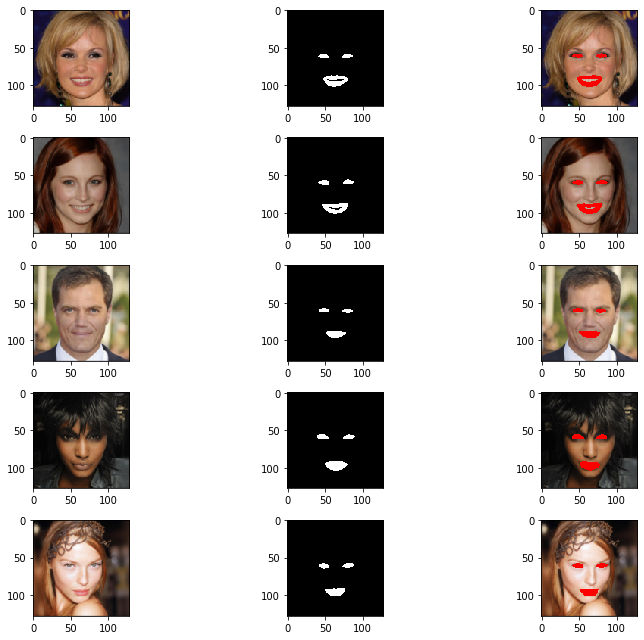

In [0]:
import numpy as np
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(15, 9))

for i in range(0,5):
    fig.add_subplot(5,3, 3*i+1)
    im1=deepcopy(X_train2[i][:,:,:])
    imshow(im1)
    fig.add_subplot(5,3, 3*i+2)
    imshow(np.squeeze(Y_train2[i]))
    fig.add_subplot(5,3, 3*i+3)
    im2=deepcopy(np.squeeze(preds_train_t[i])[:,:])
    for i in range(im2.shape[0]):
      for j in range(im2.shape[1]):
        if(im2[i,j]!=0):
          im1[i,j,:]=[255,0,0]
    imshow(im1)
plt.show()